In [1]:
import pandas as pd
import json
from google.colab import files
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving pythontest-383313-a5264cc752d5.json to pythontest-383313-a5264cc752d5.json


In [3]:
with open('/content/pythontest-383313-a5264cc752d5.json', 'rb') as f:
  data = json.load(f)

In [4]:
client_email = data['client_email']

In [5]:
client_email

'pythontest@pythontest-383313.iam.gserviceaccount.com'

In [6]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials


# Specify path to your file with credentials
path_to_credential = '/content/pythontest-383313-a5264cc752d5.json'

# Specify name of table in google sheets
table_name = 'Новая таблица'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

,person_id,bonus
0,905,85059.63838165088
1,836,7703.346074017301
2,287,3120.269742251124
3,548,5347.987141783156
4,575,137257.49061444332


In [7]:
from io import BytesIO
import requests


req = requests.get('https://docs.google.com/spreadsheets/d/1e3PRXmMNXo9AZZnaol1aHgYxtH6KYaCDymEQlK6jaO8/export?format=csv')
data = req.content

df = pd.read_csv(BytesIO(data))

In [8]:
df.head()

,date,gender,users
0,2020-06-14,Not specified,150
1,2020-06-14,male,117
2,2020-06-14,female,21


In [9]:
round(df[df['gender'] == 'male']['users'] / df['users'].sum() * 100)

1    41.0
Name: users, dtype: float64

### Скачайте файл с данными посещаемости сайта Яндекс.Метрика отсюда (сохранен в переменную df). При помощи функции np.where создайте серию, в которую будет записываться 1, если посещения были сделаны роботами с браузера, содержащего Chrome в названии, и 0 в других случаях. Поместите получившуюся серию в переменную chrome_robots.



In [10]:
y_df = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/7_browser.csv')

In [11]:
y_df.head()

,date,browser,user_type,users
0,2020-06-14,Google Chrome,People,139
1,2020-06-14,Chrome Mobile,People,35
2,2020-06-14,Google Chrome,Robots,28
3,2020-06-14,Yandex Browser,People,22
4,2020-06-14,Firefox,People,15


In [12]:
y_df['robot'] = pd.Series(np.where(y_df['user_type'] == 'Robots', 1, 0))

In [13]:
y_df['chrome'] = pd.Series(np.where(y_df['browser'].str.contains('Chrome'), 1, 0))

In [14]:
y_df.head()

,date,browser,user_type,users,robot,chrome
0,2020-06-14,Google Chrome,People,139,0,1
1,2020-06-14,Chrome Mobile,People,35,0,1
2,2020-06-14,Google Chrome,Robots,28,1,1
3,2020-06-14,Yandex Browser,People,22,0,0
4,2020-06-14,Firefox,People,15,0,0


In [15]:
y_df['robot'] & y_df['chrome']

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
dtype: int64

### ⭐️Задание со звёздочкой!⭐️

У вас есть датасет с данными о кликах и показах по объявлению, в котором есть пропуски. Вычислите количество строк без пропусков в колонке click_type. Запишите ответ в переменную not_nan_count

In [16]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361619/sample_ads.csv')

In [17]:
df

,ad_id,user_id,click_type
0,12345,qwert,top
1,12345,fsssc,center
2,12345,vfvgg,NaN
3,12345,asrvv,NaN
4,12345,tynuy,top
5,12345,vreio,NaN
6,12345,oirbv,top
7,12345,kjvbe,NaN
8,12345,vkrej,center
9,12345,krjvb,top


In [18]:
df.shape[0] - df['click_type'].isna().sum()

11

# Минипроект
Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

In [19]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')

In [20]:
df.head(6)

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


<Axes: xlabel='date', ylabel='visits'>

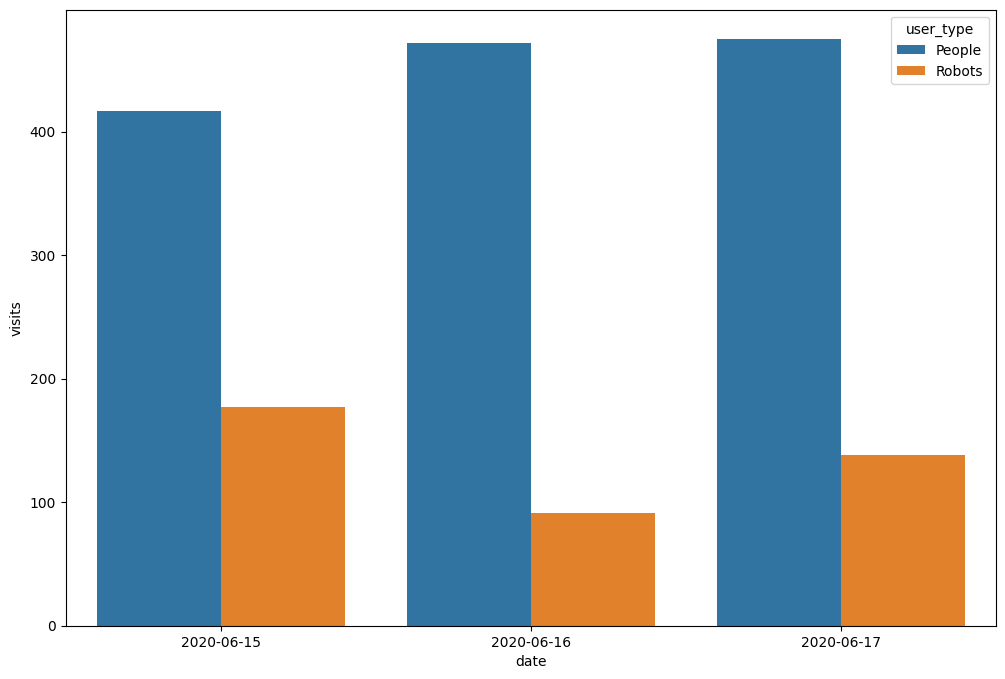

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='date', y='visits', hue='user_type')

### Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

Ответ округлите до целого.

In [22]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv')

In [23]:
round(df[df['browser'] == 'Google Chrome']['visits'][0] / df['visits'].sum() * 100)

60

### Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

В качестве ответа укажите название браузера.

In [24]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')

In [25]:
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [26]:
df[df['user_type'] == 'Robots']['visits']

1     104.0
3      31.0
6      22.0
11      7.0
12      5.0
13      4.0
15      1.0
18      1.0
21      1.0
23      1.0
Name: visits, dtype: float64

In [27]:
sum_visits = df.groupby('browser', as_index=False).agg({'visits': 'sum'})

In [28]:
sum_visits

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [29]:
df_new = df.merge(sum_visits, on='browser')

In [30]:
df_new.head()

,date,browser,user_type,visits_x,visits_y
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Yandex Browser,Robots,7.0,54.0
4,2020-06-15,Firefox,Robots,31.0,58.0


In [31]:
df_new['part_of_visits'] = df_new['visits_x'] / df_new['visits_y']

In [32]:
df_new[df_new['user_type'] == 'Robots'].loc[df_new['part_of_visits'] == df_new['part_of_visits'].max()]

,date,browser,user_type,visits_x,visits_y,part_of_visits
15,2020-06-15,UCWEB,Robots,4.0,4.0,1.0


### Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [39]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv', parse_dates=['date'])

In [42]:
df['all_visits'] = df['visits'].sum()

In [43]:
df.head()

,date,browser,user_type,visits,all_visits
0,2020-06-15,Google Chrome,People,250.0,594.0
1,2020-06-15,Google Chrome,Robots,104.0,594.0
2,2020-06-15,Yandex Browser,People,47.0,594.0
3,2020-06-15,Firefox,Robots,31.0,594.0
4,2020-06-15,Chrome Mobile,People,31.0,594.0


In [49]:
df['percent'] = round(df['visits'] / df['all_visits'] * 100, 1)

In [53]:
df[(df['browser'] == 'Safari') & (df['user_type'] == 'People')]

,date,browser,user_type,visits,all_visits,percent
7,2020-06-15,Safari,People,19.0,594.0,3.2


### 💀 Сложное задание! 💀

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

В ответе напишите слово Да, если всё сделали :)

In [54]:
df.to_csv('users_robots_percentage.csv')

In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

In [68]:
from df2gspread import df2gspread as d2g

In [73]:
df.head()

,date,browser,user_type,visits,all_visits,percent
0,2020-06-15,Google Chrome,People,250.0,594.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,594.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,594.0,7.9
3,2020-06-15,Firefox,Robots,31.0,594.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,594.0,5.2


In [81]:
spread = gs.open('Test_spreadsheet')
spread.id

'1W-5o1sqCBb3wNiCxEA8zQn75airRN8Gu1PSFh-yTvBA'

In [82]:
# Specify path to your file with credentials
path_to_credential = '/content/pythontest-383313-a5264cc752d5.json'


scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)

# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
spreadsheet_name = '1W-5o1sqCBb3wNiCxEA8zQn75airRN8Gu1PSFh-yTvBA'
sheet = 'Percentage'
d2g.upload(df, spreadsheet_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Percentage' id:1027635203>

In [60]:
work_sheet = gs.open('vgsales')

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
vg_df = pd.DataFrame(data, columns=headers)
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,28.06.1905,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,07.06.1905,Platform,Nintendo,"44 802,00",3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,30.06.1905,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,01.07.1905,Sports,Nintendo,15.75,"44 572,00",3.28,2.96,"33,00"
4,5,Pokemon Red/Pokemon Blue,GB,18.06.1905,Role-Playing,Nintendo,11.27,8.89,10.22,"1,00",31.37


#### Send to VK

In [84]:
!pip install vk_api -q
import vk_api

In [136]:
import requests
import json
from io import BytesIO

In [100]:
token = 'vk1.a.IF7DTk4wskl4H8wl3ZTIp_r96xmv-OBEe4NumVHFRyBwxCXAXr1uIZqAcFnncSDsszo5AfuF0zQ-9SJZthJ_71ZWlCc7tV0KGLBZh3lMLykkT9mrhk4seHtMxcby8oDaqB5fwYkSIBvhz1xYcm_RYV9xYedRS5o8g7_uClcuG8KZ3S_7TB50iTWOdZV9NnHCixhaVOZbv9DmLyMPWITf2Q'

In [101]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

In [103]:
vk.messages.send(
    user_id=513613,
    random_id=0,
    message='Matrix has you ...')

7

In [125]:
path_to_file = '/content/users_robots_percentage.csv'
file_name = 'users_robots_percentage.csv'

upload_url = vk.docs.getMessagesUploadServer(peer_id=513613)["upload_url"]
file = {'file': (file_name, open(path_to_file, 'rb'))}

response = requests.post(upload_url, files=file)

json_data = json.loads(response.text)
json_data

{'file': '513613|0|-1|237331|953a3487a4|csv|1154|users_robots_percentage.csv|ff645849ef3ec7078779479d612eb6d5|1b8b0478c813e958ea9088f82660a06e||||eyJkaXNrIjoxNiwicGVlcl9zZW5kZXIiOiItMjE5ODczNDQ5In0='}

In [126]:
saved_file = vk.docs.save(file=json_data['file'], title=file_name)

In [127]:
saved_file

{'type': 'doc',
 'doc': {'id': 657130107,
  'owner_id': 513613,
  'title': 'users_robots_percentage.csv',
  'size': 1154,
  'ext': 'csv',
  'date': 1681211645,
  'type': 1,
  'url': 'https://vk.com/doc513613_657130107?hash=ZLTR8B9WmxXfCUUlMQVbqJEHG3hSLHqIOsALFXiXmao&dl=FUZDCOJYG4ZTINBZ:1681211645:ZeVPxk6OiAzyqkAmgKfZSDqPZToSMZUUHQLE9CXmK9c&api=1&no_preview=1',
  'is_unsafe': 0}}

In [128]:
attachment = 'doc{}_{}'.format(saved_file['doc']['owner_id'], saved_file['doc']['id'])

In [129]:
attachment

'doc513613_657130107'

In [130]:
vk.messages.send(
    user_id=513613,
    random_id=3,
    message='Посылка!', 
    attachment = attachment
)

8

In [139]:
vk.messages.send(
    user_id=513613,
    random_id=5,
    message='https://docs.google.com/spreadsheets/d/1lYPp30nE9Uy5DzHSqia7Iia_3d9MtnnyzpoW5nMTFzk/edit?usp=sharing', 
)

9

### ⭐️Задание со звёздочкой!⭐️

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [142]:


r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

users = pd.read_csv(BytesIO(data))

In [143]:
users.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [147]:
urp = pd.read_csv('/content/users_robots_percentage.csv', index_col='Unnamed: 0')

In [148]:
urp.head()

,date,browser,user_type,visits,all_visits,percent
0,2020-06-15,Google Chrome,People,250.0,594.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,594.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,594.0,7.9
3,2020-06-15,Firefox,Robots,31.0,594.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,594.0,5.2


In [151]:
all_users = users.merge(urp, on=['date', 'browser', 'user_type'])

In [169]:
all_users['visits_per_users'] = round(all_users['visits'] / all_users['users'])

In [170]:
all_users[(all_users['browser'] == 'Google Chrome') & (all_users['user_type'] == 'Robots')]

,date,browser,user_type,users,visits,all_visits,percent,visits_per_users
1,2020-06-15,Google Chrome,Robots,104.0,104.0,594.0,17.5,1.0


# Минипроект

В рамках дополнительного проекта попробуем освоить API, позволяющий получать данные о музейных коллекциях. Это задание может пригодиться для большего понимания того, какими способами можно собирать и обрабатывать данные, например, для собственного проекта или другой рабочей задачи. Также вы можете более глубоко изучить документацию, чтобы потом исследовать другие интересные для себя вопросы по полученным данным :)

In [171]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=QUERY')
res = r.json()

In [ ]:
res

In [173]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=sunflowers')
res = r.json()

In [175]:
sunflower_ids = res['objectIDs']

In [176]:
ids = [2032,
16822570,
437329,
436524,
20149]

In [186]:
valid_ids = [id for id in ids if id in sunflower_ids]

In [187]:
valid_ids

[2032, 437329, 436524]

In [179]:
OBJECT_ID = 437980

In [180]:
r_test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{OBJECT_ID}')
obj_test = r_test.json()

In [185]:
obj_test['title']

'Cypresses'

In [195]:
obj_list = [requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{id}').json() for id in sunflower_ids]
  

In [198]:
len(obj_list)

90

In [204]:
sunflower_df = pd.DataFrame([(obj.get('objectID', np.NaN), obj.get('title', np.NaN), obj.get('artistDisplayName', np.NaN),
               obj.get('department', np.NaN), obj.get('objectBeginDate', np.NaN), obj.get('objectEndDate', np.NaN),
               obj.get('period', np.NaN), obj.get('objectName', np.NaN), obj.get('culture', np.NaN)) 
for obj in obj_list], columns=['objectID', 'title', 'artistDisplayName', 'department', 'objectBeginDate', 
                                                                                 'objectEndDate', 'period', 'objectName', 'culture'])

In [205]:
sunflower_df[sunflower_df['culture'] == "Japan"]

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
28,57922.0,Incense box,,Asian Art,1700.0,1799.0,Edo period (1615–1868),Incense box,Japan


In [206]:
req = 'https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=6&q=cat'


In [208]:
r = requests.get(req)
res = r.json()
cat_ids = res['objectIDs']

In [213]:
cat_ids = cat_ids[:1000]

In [215]:
obj_list = [requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{id}').json() for id in cat_ids]

In [216]:
cats_df = pd.DataFrame([(obj.get('objectID', np.NaN), obj.get('title', np.NaN), obj.get('artistDisplayName', np.NaN),
               obj.get('department', np.NaN), obj.get('objectBeginDate', np.NaN), obj.get('objectEndDate', np.NaN),
               obj.get('period', np.NaN), obj.get('objectName', np.NaN), obj.get('culture', np.NaN)) 
for obj in obj_list], columns=['objectID', 'title', 'artistDisplayName', 'department', 'objectBeginDate', 
                                                                                 'objectEndDate', 'period', 'objectName', 'culture'])

In [226]:
cats_df.groupby('period', as_index=False).agg({'title': 'count'}).sort_values('title')

,period,title
48,"Ming dynasty (1368–1644), Chongzen period (162...",1
36,Late Yuan (1271–1368) or early Ming (1368–1644...,1
39,Majapahit period (1296–1520),1
79,Southern Song (1127–1279)–Yuan (1271–1368) dyn...,1
41,Mauryan,1
...,...,...
59,Muromachi period (1392–1573),32
29,Kamakura period (1185–1333),32
68,Qing dynasty (1644–1911),45
0,,123
